<a href="https://colab.research.google.com/github/wain02/7506R-2C2023-GRUPO29/blob/main/7506R_TP1_GRUPO29_CHP3_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Datos
import numpy as np
import pandas as pd

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#deberiamos usar el dataset del chp2 supongo

hotels_tr = pd.read_csv("hoteles_tr_normalizado.csv")
hotels_tr.head(5)

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores
0,0,City Hotel,112.259683,2016,September,5,1.0,2,1.865199,0.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,1,1,-1.0
1,1,Resort Hotel,112.259683,2015,October,31,0.0,1,1.865199,0.0,...,No Deposit,-9999.0,-9999.0,0,Transient,102.550188,1,0,0,-1.0
2,2,City Hotel,112.259683,2016,October,13,0.0,1,1.865199,2.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,2,0,-1.0
3,3,City Hotel,112.259683,2016,December,12,2.0,5,1.865199,0.0,...,Non Refund,154.0,-9999.0,0,Transient,102.550188,0,0,1,-1.0
4,4,City Hotel,112.259683,2017,March,19,2.0,5,1.865199,0.0,...,No Deposit,20.0,-9999.0,0,Transient-Party,102.550188,0,1,0,-1.0


In [ ]:
hotels_tr.fillna(0, inplace=True)

Preparo el dataset para trabajar solo con numeros

In [ ]:
month_number_in_season = {
    'January': 0,
    'February': 0,
    'March': 0,
    'April': 1,
    'May': 1,
    'June': 1,
    'July': 1,
    'August': 1,
    'September': 1,
    'October': 1,
    'November': 0,
    'December': 0
}
hotels_tr['arrival_date_month'] = hotels_tr['arrival_date_month'].map(month_number_in_season)

In [ ]:
hotels_tr.head()

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores
0,0,City Hotel,112.259683,2016,1,5,1.0,2,1.865199,0.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,1,1,-1.0
1,1,Resort Hotel,112.259683,2015,1,31,0.0,1,1.865199,0.0,...,No Deposit,-9999.0,-9999.0,0,Transient,102.550188,1,0,0,-1.0
2,2,City Hotel,112.259683,2016,1,13,0.0,1,1.865199,2.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,2,0,-1.0
3,3,City Hotel,112.259683,2016,0,12,2.0,5,1.865199,0.0,...,Non Refund,154.0,-9999.0,0,Transient,102.550188,0,0,1,-1.0
4,4,City Hotel,112.259683,2017,0,19,2.0,5,1.865199,0.0,...,No Deposit,20.0,-9999.0,0,Transient-Party,102.550188,0,1,0,-1.0


In [ ]:
country_counts  = hotels_tr["country"].value_counts()

# Obtenemos los 10 países principales
top_10_countries = country_counts.head(10).index

# Reemplazo los países que no están en el top 10 con "otros"
hotels_tr["country"] = hotels_tr["country"].apply(lambda x: x if x in top_10_countries else "otros")

In [ ]:
variables_categoricas = ["hotel","arrival_date_month","meal", "country", "market_segment",
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type",
"customer_type"]


target='is_canceled'

In [ ]:
#One hot encoding para variables categoricas
hotels_tr = pd.get_dummies(hotels_tr, columns= variables_categoricas, drop_first=True)
hotels_tr.head()

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,112.259683,2016,5,1.0,2,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,112.259683,2015,31,0.0,1,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,112.259683,2016,13,0.0,1,1.865199,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,112.259683,2016,12,2.0,5,1.865199,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,112.259683,2017,19,2.0,5,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
hotels_tr.columns.tolist()

['Unnamed: 0',
 'lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled',
 'scores',
 'hotel_Resort Hotel',
 'arrival_date_month_1',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_BRA',
 'country_DEU',
 'country_ESP',
 'country_FRA',
 'country_GBR',
 'country_IRL',
 'country_ITA',
 'country_PRT',
 'country_USA',
 'country_otros',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channe

##KNN

In [ ]:
#Separar datos y etiquetas
x = hotels_tr.drop(['is_canceled'], axis='columns', inplace=False)
y = hotels_tr['is_canceled'].copy()

#Separo conjunto de Train y de Test (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
#proporcion 20 test, train 80

modelo con sus parametros por defecto

In [ ]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Pruebo el modelo sin optimizar ni nada

In [ ]:
y_train.isna().any()

False

In [ ]:
#Entrenar el modelo
KNN_Classifier.fit(x_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(x_test)

In [ ]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  6483
total:  12342


Sin tocar el dataset mucho tuvimos una prediccion correcta por arriba de la mitad, Hay que mejorarlo

In [ ]:
accuracy_score(y_test,y_pred)

0.5252795333009237

###Cross - Validation:  no tiene una predicción acertada, lo descartamos

In [ ]:
# Variamos la cantidad de vecinos (K)

metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(10,20) # vecinos desde 1 hasta cantidad total de puntos en test

for n in k_range:

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    metrics.append((n, (y_test == y_pred).sum()))

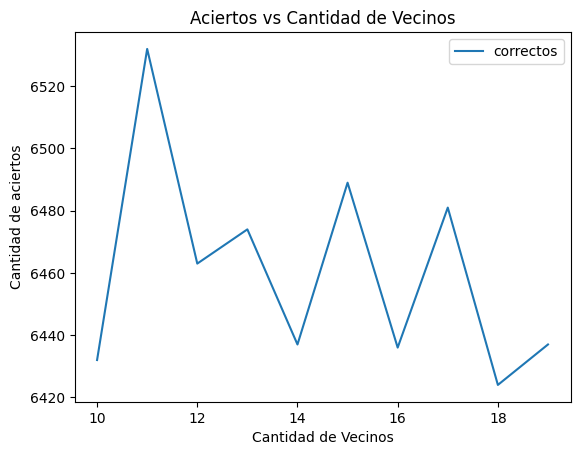

In [ ]:
# ploteamos

df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos',
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

Variamos la cantidad de Vecino, para mejorar el accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

k_range=range(10,20) #canidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train,y_train,cv=7,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

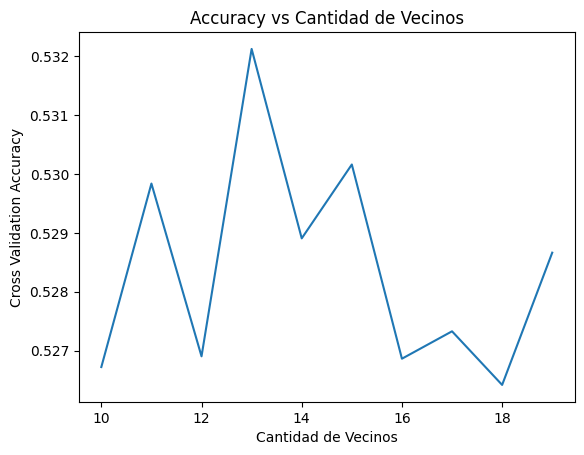

In [ ]:
#ploteamos accuracy vs cantidad de vecinos
plt.plot(k_range, k_scores)
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('Cross Validation Accuracy')
plt.title('Accuracy vs Cantidad de Vecinos')
plt.show()


###Cross Validation - Optimizando hiperparametros

In [ ]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis', 'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(10,20),
              'weights':['distance','uniform'],
              'algorithm':['kd_tree'],
              'metric':['euclidean']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=7, scoring='accuracy', n_iter=7, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.53002188, 0.52698323, 0.52639575, 0.52872539, 0.53135889,
       0.52669962, 0.53018394])

In [ ]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 16, 'metric': 'euclidean', 'algorithm': 'kd_tree'}
0.5313588850174217


In [ ]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.5277102576567817

              precision    recall  f1-score   support

           0       0.52      0.53      0.52      6066
           1       0.54      0.53      0.53      6276

    accuracy                           0.53     12342
   macro avg       0.53      0.53      0.53     12342
weighted avg       0.53      0.53      0.53     12342



Text(50.722222222222214, 0.5, 'True')

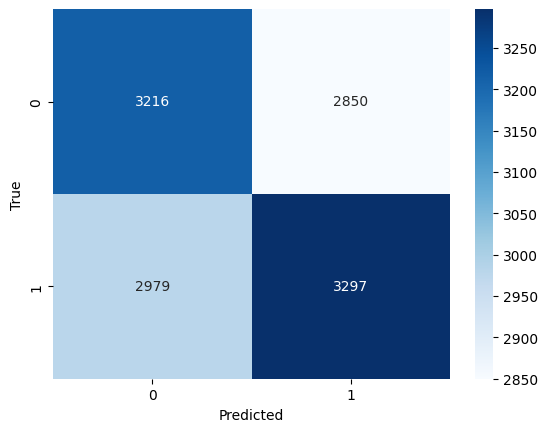

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

##SVM


###Librerias y Funciones

In [ ]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))

  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

###Normalizacion de datos

In [ ]:
#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_test_minmax  = min_max_scaler.transform(x_test)

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

###SVM

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      6066
           1       0.83      0.00      0.00      6276

    accuracy                           0.49     12342
   macro avg       0.66      0.50      0.33     12342
weighted avg       0.67      0.49      0.32     12342



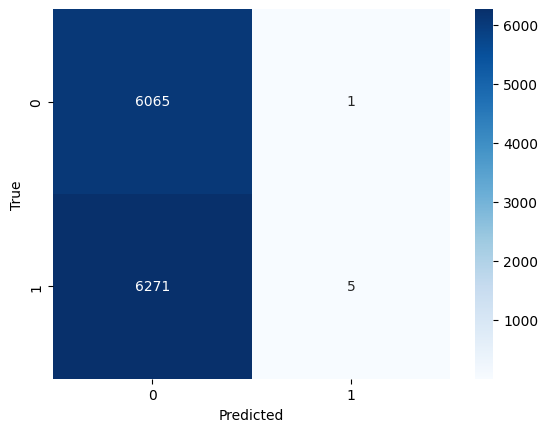

In [ ]:
#Construyo un modelo SVM
svm = SVC()

#Lo entreno con los datos sin escalar
svm.fit(x_train, y_train)

#Hago la prediccion y calculo las métricas
y_pred=svm.predict(x_test)
metricas(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      6066
           1       0.83      0.82      0.83      6276

    accuracy                           0.83     12342
   macro avg       0.83      0.83      0.83     12342
weighted avg       0.83      0.83      0.83     12342



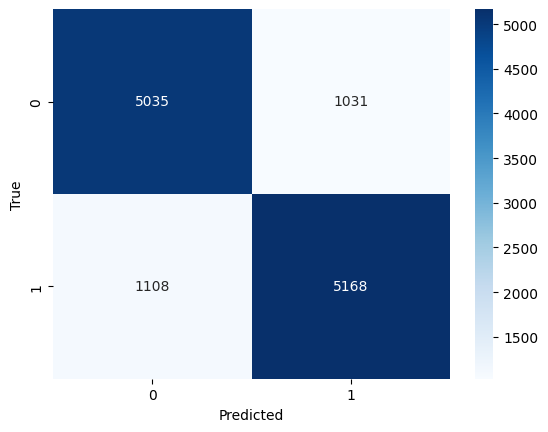

In [ ]:
#Construyo un modelo SVM
svm_norm= SVC()

#Lo entreno con los datos escalados con normalizacion
svm_norm.fit(x_train_norm, y_train)

#Hago la prediccion y calculo las métricas
y_pred_norm=svm_norm.predict(x_test_norm)
metricas(y_pred_norm,y_test)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      6066
           1       0.80      0.84      0.82      6276

    accuracy                           0.82     12342
   macro avg       0.82      0.82      0.82     12342
weighted avg       0.82      0.82      0.82     12342



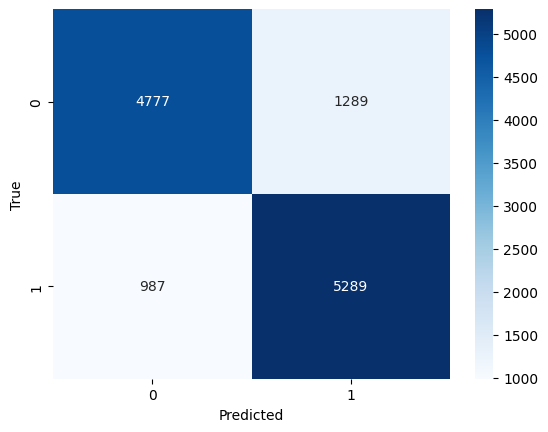

In [ ]:
#Construyo un modelo SVM
svm_minmax= SVC()

#Lo entreno con los datos escalados con min max
svm_minmax.fit(x_train_minmax, y_train)

#Hago la prediccion y calculo las métricas
y_pred_minmax=svm_minmax.predict(x_test_minmax)
metricas(y_pred_minmax,y_test)

###Kernel- Radial

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      6066
           1       0.83      0.74      0.78      6276

    accuracy                           0.79     12342
   macro avg       0.79      0.79      0.79     12342
weighted avg       0.79      0.79      0.79     12342



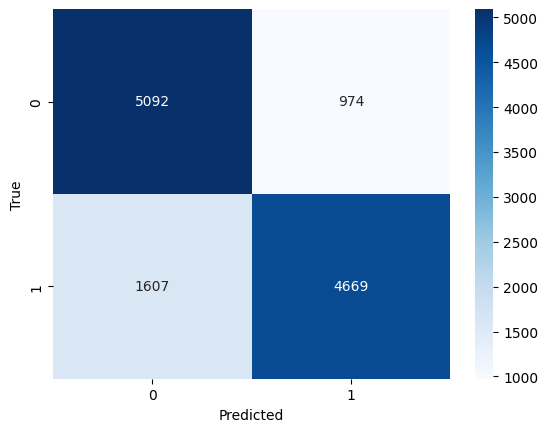

In [ ]:
#Creo un clasificador con kernel radial y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='rbf', C=5, gamma=10)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_rad=clf.predict(x_test_minmax)
metricas(y_pred_rad,y_test)

##Random Forest

In [ ]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
#import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

los pone aleatorios a los datos a los datos la profe. hay que ver cuales nos conviene

In [ ]:
#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto',
                             oob_score=True,
                             random_state=2,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

In [ ]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
#Valores Reales
y_test.values

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,1,1
1,1,1
2,1,0
3,0,1
4,0,0


Text(50.722222222222214, 0.5, 'True')

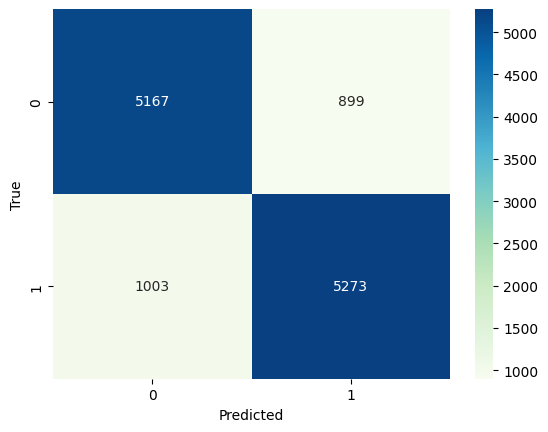

In [ ]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.8458920758385999
Recall: 0.8401848311026131
f1 score: 0.8472043701799487


###Grafico el Random Forest

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.estimators_[48]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=546147920)

In [ ]:
#arbol grande sin podar
"""plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model.estimators_[48],
                                 feature_names=x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Not Survived','Survived']) #model.classes_
plt.show(tree_plot_completo)"""

"plt.figure(figsize=(100,100))\n\ntree_plot_completo=tree.plot_tree(model.estimators_[48],\n                                 feature_names=x.columns.to_list(),\n                                 filled=True,\n                                 rounded=True,\n                                 class_names=['Not Survived','Survived']) #model.classes_\nplt.show(tree_plot_completo)"

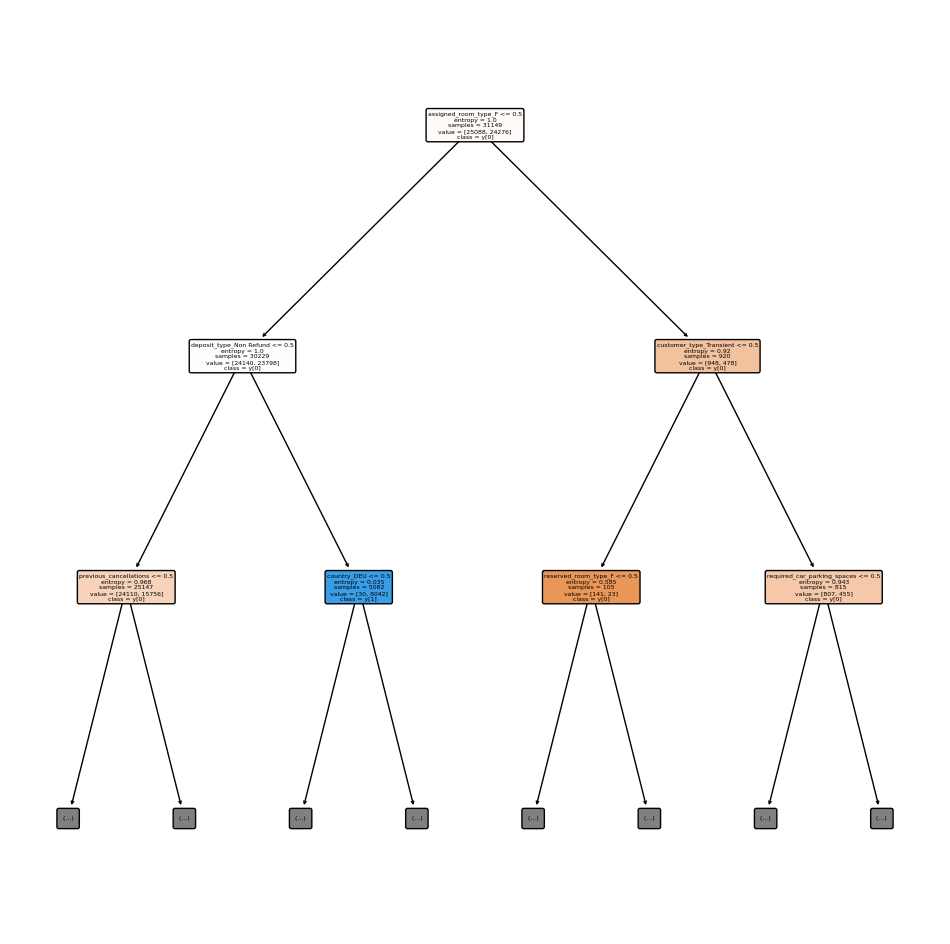

In [ ]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(model.estimators_[48],
                         max_depth=2,
                         feature_names=x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

###Cross Validation

Buscamos hiperparametros con GridSearch CV

In [ ]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 10, 12, 16],
               "n_estimators": [10,20, 50] }

#Probamos entrenando sólo con 1 métrica
gs = GridSearchCV(estimator=rf_cv, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1)
gs_fit = gs.fit(X = x_train, y = y_train)

In [ ]:
gs_fit.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

Mejor metrica

In [ ]:
print("accuracy en entrenamiento con cv: "+str(gs_fit.best_score_))

accuracy en entrenamiento con cv: 0.8558868045572613


Predecimos utilizando el mejor modelo que obtuvimos en entrenamiento

In [ ]:
#Obtenemos el mejor modelo
rf_cv_best=gs_fit.best_estimator_

#Predicción
y_pred_rf_cv_best = rf_cv_best.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6066
           1       0.86      0.85      0.86      6276

    accuracy                           0.86     12342
   macro avg       0.86      0.86      0.86     12342
weighted avg       0.86      0.86      0.86     12342



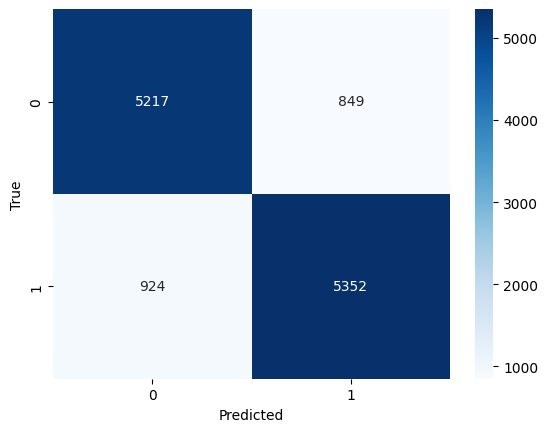

In [ ]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_rf_cv_best)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred_rf_cv_best))

In [ ]:
#Evaluo la performance en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_rf_cv_best)
recall=recall_score(y_test,y_pred_rf_cv_best)
f1=f1_score(y_test,y_pred_rf_cv_best)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.8563441905687895
Recall: 0.8527724665391969
f1 score: 0.8578985333012743


##XGBoost

importo librerias

In [ ]:
import pandas as pd
import numpy as np

import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
from six import StringIO
import pydotplus
from IPython.display import Image

from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

import warnings

In [ ]:
#Creo el modelo y lo entreno

import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

AUC: 0.9394134905880229
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6066
           1       0.85      0.86      0.85      6276

    accuracy                           0.85     12342
   macro avg       0.85      0.85      0.85     12342
weighted avg       0.85      0.85      0.85     12342



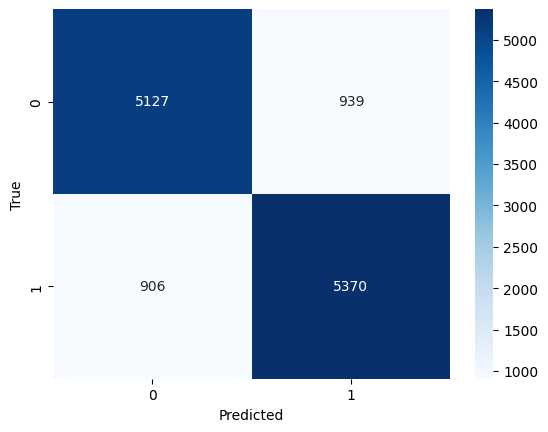

In [ ]:
#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [ ]:
#Datos de entrenamiento en formaro DMatrix
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

#Entreno CV para probar el learning rate
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.1},num_boost_round=8,metrics='auc')
results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.876838,0.001585,0.875176,0.001894
1,0.885323,0.000716,0.884295,0.001054
2,0.886659,0.000755,0.885644,0.001287
3,0.887334,0.001230,0.886362,0.000989
4,0.889560,0.000647,0.888364,0.001567
5,0.892115,0.000754,0.891059,0.000977
6,0.894131,0.000983,0.893060,0.000684
7,0.896694,0.001688,0.895373,0.001899


In [ ]:
#Entreno CV para probar el learning rate mas alto
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.2},num_boost_round=8,metrics='auc',seed=0)
results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.876838,0.001585,0.875176,0.001894
1,0.886432,0.000800,0.885380,0.001285
2,0.891904,0.000560,0.890834,0.001059
3,0.896355,0.001404,0.895149,0.002059
4,0.901470,0.001467,0.899738,0.002059
5,0.903545,0.000850,0.902255,0.000345
6,0.905708,0.001263,0.904085,0.001061
7,0.908082,0.000907,0.906268,0.001286


##Ensambles Hibridos

Librerias

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###Stacking

In [ ]:
#Creo un conjunto de datos para entrenar los modelos
x, y = make_classification(n_samples=300,
                           n_features=20,
                           n_informative=15,
                           n_redundant=5,
                           n_clusters_per_class=5,
                           class_sep=0.7,
                           flip_y=0.03,
                           n_classes=2)

In [ ]:
#Funcion para evaluar los modelos 5fold -CV (repite 2 veces)
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, verbose=2, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
#Funcion para plotear a performance
def plot_results(model_scores, name):

    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )

    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

In [ ]:
#Armo conjunto entrenamiento y test 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80)

In [ ]:
#Modelos Base
base_models = {'random_forest':RandomForestClassifier(n_estimators=50),
               'svm': SVC(),
               'knn': KNeighborsClassifier(n_neighbors=11)}

#Guarda los scores de cada modelo
model_scores = defaultdict()

#Entreno los clasificadores
for name, model in base_models.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, x_train, y_train)
    model_scores[name] = scores

Evaluating random_forest


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Evaluating svm
Evaluating knn


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [ ]:
from sklearn.ensemble import StackingClassifier

#Modelos Base
base_models = [('random_forest', RandomForestClassifier(n_estimators=50)),
               ('svm', SVC()),
               ('knn', KNeighborsClassifier(n_neighbors=11))]

#Meta Modelo
meta_model = LogisticRegressionCV()

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models,
                                    final_estimator=meta_model,
                                    passthrough=True,
                                    cv=5,
                                    verbose=2)

In [ ]:
#Performance el modelo en entrenamiento
stacking_scores = evaluate_model(stacking_model, x_train, y_train)
model_scores['stacking'] = stacking_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.8s finished


In [ ]:
#Grafico performance
plot_results(model_scores, name='stacking_model_cv')

In [ ]:
#Evaluo en conjunto de test
#stacking_model.fit(x_train,y_train).score(x_test,y_test)
stacking_model.fit(x_train,y_train)
y_pred_st = stacking_model.predict(x_test)
accuracy_score(y_test, y_pred_st)

0.7333333333333333

###Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Creo un conjunto de datos para entrenar los modelos

x, y = make_classification(n_samples=3000,
                           n_features=20,
                           n_informative=15,
                           n_redundant=5,
                           n_clusters_per_class=5,
                           class_sep=0.7,
                           flip_y=0.03,
                           n_classes=2)

In [ ]:
#Creo clasificadores

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

#Creo ensemble de Votación
vot_clf = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf)], voting = 'hard')

#Armo conjunto entrenamiento y test 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, train_size = 0.80) #nuestro

#Entreno el ensemble
vot_clf.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf.predict(x_test)
accuracy_score(y_test, pred)

0.755

##Kaggle

In [ ]:
ds_hotels_test = pd.read_csv("hotels_test.csv")
ds_h_test = ds_hotels_test.copy()

In [ ]:
ds_h_test.fillna(0, inplace=True)

In [ ]:
filas_totales=ds_hotels_test.shape[0]
print(ds_h_test.isna().sum()/filas_totales*100)

hotel                             0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [ ]:
month_number_in_season = {
    'January': 0,
    'February': 0,
    'March': 0,
    'April': 1,
    'May': 1,
    'June': 1,
    'July': 1,
    'August': 1,
    'September': 1,
    'October': 1,
    'November': 0,
    'December': 0
}
ds_h_test['arrival_date_month'] = ds_h_test['arrival_date_month'].map(month_number_in_season)

In [ ]:
country_counts  = ds_h_test["country"].value_counts()

# Obtenemos los 10 países principales
top_10_countries = country_counts.head(10).index

# Reemplazo los países que no están en el top 10 con "otros"
ds_h_test["country"] = ds_h_test["country"].apply(lambda x: x if x in top_10_countries else "otros")

In [ ]:
ds_h_test.isna().any()

hotel                             False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False


In [ ]:
ds_h_test.isin(['Undefined']).sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                              238
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_type                       0
adr         

In [ ]:
#One hot encoding para variables categoricas
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment",
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type",
"customer_type"]
ds_h_test = pd.get_dummies(ds_h_test, columns=var_cual, drop_first=True)

ds_h_test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,277,2016,46,7,1,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,286,2016,20,11,0,4,2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2016,35,23,0,1,3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,196,2016,44,29,2,5,2,2.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,232,2016,48,26,2,1,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
print(ds_h_test.isna().sum()/filas_totales*100)

lead_time                        0.0
arrival_date_year                0.0
arrival_date_week_number         0.0
arrival_date_day_of_month        0.0
stays_in_weekend_nights          0.0
                                ... 
deposit_type_Non Refund          0.0
deposit_type_Refundable          0.0
customer_type_Group              0.0
customer_type_Transient          0.0
customer_type_Transient-Party    0.0
Length: 69, dtype: float64


In [ ]:
diff_cols_df2 = set(hotels_tr.columns) - set(ds_h_test.columns)

# Agrego las columnas faltantes en ds_h_test y las inicializo en false
for col in diff_cols_df2:
    ds_h_test[col] = np.False_

# Solo me quedo con las columnas de ds_h_test que esten en ds
df_test = ds_h_test[hotels_tr.columns]

In [ ]:
Sds_kag = df_test.drop(["is_canceled"], axis="columns", inplace=True)

<ipython-input-211-e74ada0915eb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
pipeline = Pipeline([  ('imputer', imputer)])
pipeline.fit(hotels_tr)

# Obtener lista de columnas de ds
cols_ds = hotels_tr.columns

# Seleccionar solo las columnas presentes en ds en ds_h_test
cols_ds_h_test = [col for col in df_test.columns if col in cols_ds]

# Aplicar pipeline solo a las columnas presentes en ambos dataframes
pipeline.fit(hotels_tr[cols_ds_h_test])
df_test[cols_ds_h_test] = pipeline.transform(df_test[cols_ds_h_test])

<ipython-input-212-b596b527be05>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_test.head()

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.0,277.0,2016.0,7.0,1.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,286.0,2016.0,11.0,0.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,2016.0,23.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,196.0,2016.0,29.0,2.0,5.0,2.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,232.0,2016.0,26.0,2.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
ds_h_test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,scores,is_canceled,distribution_channel_Undefined,Unnamed: 0,assigned_room_type_L,market_segment_Undefined
0,277,2016,46,7,1,2,2,0.0,0,0,...,0,0,1,0,False,False,False,False,False,False
1,286,2016,20,11,0,4,2,0.0,0,0,...,0,0,0,1,False,False,False,False,False,False
2,0,2016,35,23,0,1,3,0.0,0,0,...,0,0,1,0,False,False,False,False,False,False
3,196,2016,44,29,2,5,2,2.0,0,0,...,0,0,1,0,False,False,False,False,False,False
4,232,2016,48,26,2,1,2,0.0,0,0,...,0,0,1,0,False,False,False,False,False,False


In [ ]:
hotels_tr.head()

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,112.259683,2016,5,1.0,2,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,112.259683,2015,31,0.0,1,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,112.259683,2016,13,0.0,1,1.865199,2.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,112.259683,2016,12,2.0,5,1.865199,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,112.259683,2017,19,2.0,5,1.865199,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:

y_pred_kaggle = rfc.predict(df_test)


In [ ]:
ds_kaggle = pd.DataFrame({'id': ds_h_test['id'], 'is_canceled': y_pred_kaggle})

In [ ]:
ds_kaggle.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
ds_kaggle.shape[0]

26535

In [ ]:
ds_kaggle.to_csv('pred_kaggle.csv', index=False)